In [85]:
import pandas as pd
covid = pd.read_csv('COVID.csv')
covid.head()

,municipality_name,date,sex,age_gr,incidence,infection_1,infection_2,infection_3,infection_4,deaths_all,deaths_cov1,deaths_cov2,deaths_cov3,object_id
0,Marijampolės sav.,2/1/2020 12:00:00 AM,Moteris,100-109,0,0,0,0,0,1,0,0,0,1
1,Alytaus m. sav.,2/1/2020 12:00:00 AM,Moteris,60-69,0,0,0,0,0,1,0,0,0,2
2,Tauragės r. sav.,2/1/2020 12:00:00 AM,Moteris,60-69,0,0,0,0,0,1,0,0,0,3
3,Kalvarijos sav.,2/1/2020 12:00:00 AM,Moteris,70-79,0,0,0,0,0,1,0,0,0,4
4,Kelmės r. sav.,2/1/2020 12:00:00 AM,Moteris,70-79,0,0,0,0,0,1,0,0,0,5


### Building chart for new cases of COVID19 in Lithuania with 14-days rolling average for different age groups

In [86]:
#delete unnecessary columns
covid.drop(columns=['infection_1', 'infection_2', 'infection_3', 'infection_4', 'deaths_cov1', 'deaths_cov2', 'deaths_cov3'], inplace=True)
covid.head()

,municipality_name,date,sex,age_gr,incidence,deaths_all,object_id
0,Marijampolės sav.,2/1/2020 12:00:00 AM,Moteris,100-109,0,1,1
1,Alytaus m. sav.,2/1/2020 12:00:00 AM,Moteris,60-69,0,1,2
2,Tauragės r. sav.,2/1/2020 12:00:00 AM,Moteris,60-69,0,1,3
3,Kalvarijos sav.,2/1/2020 12:00:00 AM,Moteris,70-79,0,1,4
4,Kelmės r. sav.,2/1/2020 12:00:00 AM,Moteris,70-79,0,1,5


In [87]:
covid['date'] = pd.to_datetime(covid['date'])  # to leave only date in date column
# group max ages to 1 age groups
def elderly_group(age):
    if age in ['80-89','90-99', '100-109', '110-119']:
        return '80+'
    else:
        return age

covid['age_gr'] = covid['age_gr'].apply(elderly_group) 

grouped=covid.groupby(['date', 'age_gr']).sum('incidence') # sums incidence by each date and age group
grouped.drop(columns=['object_id', 'deaths_all'], inplace=True) # these colums we don't need for now
grouped.head()

C:\Users\Laptop\AppData\Local\Temp\ipykernel_6968\1059847521.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  covid['date'] = pd.to_datetime(covid['date'])  # to leave only date in date column


incidence
date       age_gr           
2020-02-01 0-9             0
           20-29           0
           30-39           0
           40-49           0
           50-59           0

In [88]:
#pivot the table to have age groups as columns and dates as rows
pivoted = grouped.reset_index().pivot(index='date', columns='age_gr', values='incidence')
pivoted.drop(columns=['Nenustatyta'], inplace=True) # nenustatyta means unknown, we don't need it
rolling = pivoted.rolling(window=14).mean() # calculate rolling mean for 14 days
january = rolling.loc['2022-01'] # filter for end of January 2022, as plot later shows it's period with most new cases in most age groups
january.tail()

age_gr,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+
date,,,,,,,,,
2022-01-27,299.571429,1772.000000,936.000000,1270.714286,1293.357143,898.500000,611.928571,204.214286,119.857143
2022-01-28,326.214286,1973.357143,995.071429,1354.857143,1409.714286,959.142857,652.642857,218.428571,126.428571
2022-01-29,340.857143,2126.285714,1048.142857,1435.214286,1520.071429,1020.428571,691.071429,231.000000,130.571429
2022-01-30,354.000000,2207.714286,1073.071429,1483.357143,1579.714286,1055.000000,713.785714,238.285714,134.285714
2022-01-31,375.357143,2284.571429,1105.428571,1535.285714,1654.142857,1101.785714,742.500000,248.214286,139.071429


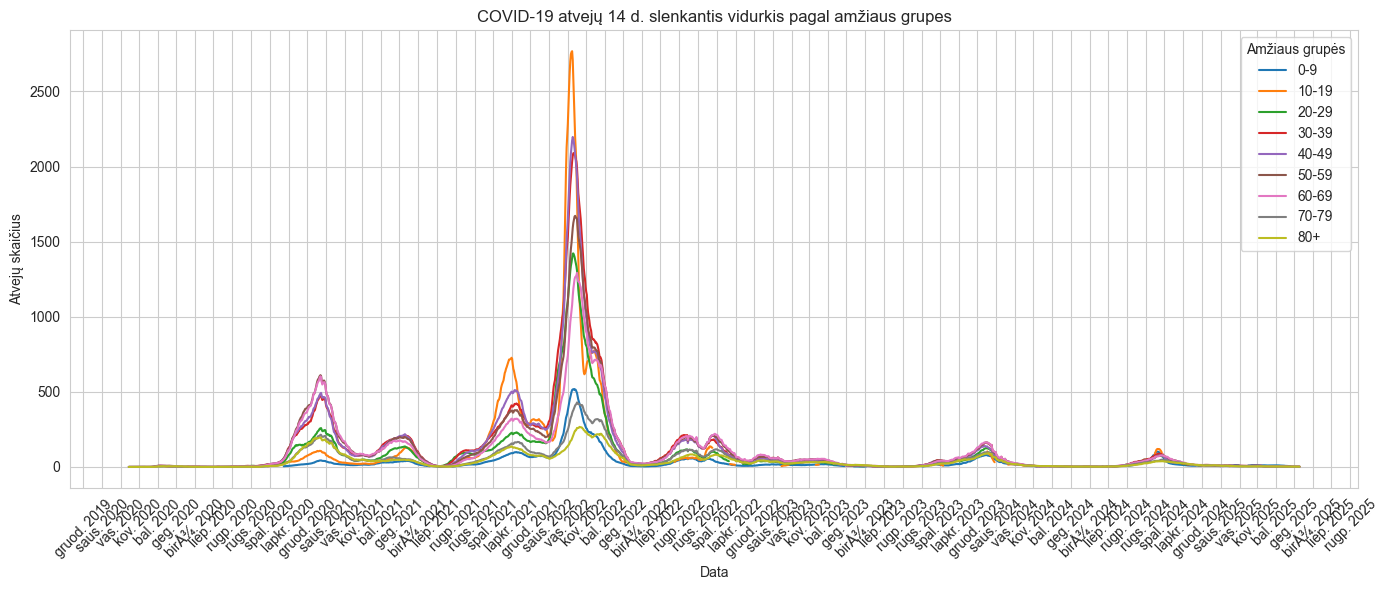

In [89]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import locale

# Try to set Lithuanian locale
try:
    locale.setlocale(locale.LC_TIME, 'lt_LT.UTF-8')
except locale.Error:
    locale.setlocale(locale.LC_TIME, '')

plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

for col in rolling.columns:
    plt.plot(rolling.index, rolling[col], label=col) # separate line for each age group
#New COVID cases in Lithuania by age group with 14-day rolling average
plt.title('COVID-19 atvejų 14 d. slenkantis vidurkis pagal amžiaus grupes')
plt.xlabel('Data')
plt.ylabel('Atvejų skaičius') #new cases
plt.legend(title='Amžiaus grupės') #age groups

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # show every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) #show month and year

plt.xticks(rotation=45) # rotate x-axis labels
plt.tight_layout()
# save the plot
plt.savefig('chart1.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()



### Normalizing this chart if population in each age group would be 100.000

In [90]:
# Load excel with population by age group
pop_age = pd.read_excel('population_by_age_group.xlsx')
pop_age

,age_group,population
0,0-9,251743
1,10-19,271449
2,20-29,312264
3,30-39,382619
4,40-49,374566
5,50-59,424640
6,60-69,369020
7,70-79,242075
8,80+,158839


In [91]:
#how many new cases per 100000 people of this age group
equal_pop = 100000  

# Make a copy to avoid modifying original
normalized = rolling.copy()

# Normalize each age group as if all had equal population
#devides number of new cases of this age group to population of this age group and multiply by equal population
for group in normalized.columns:  
    actual_pop = pop_age.loc[pop_age['age_group'] == group, 'population']
    normalized[group] = (normalized[group] / actual_pop.values[0]) * equal_pop

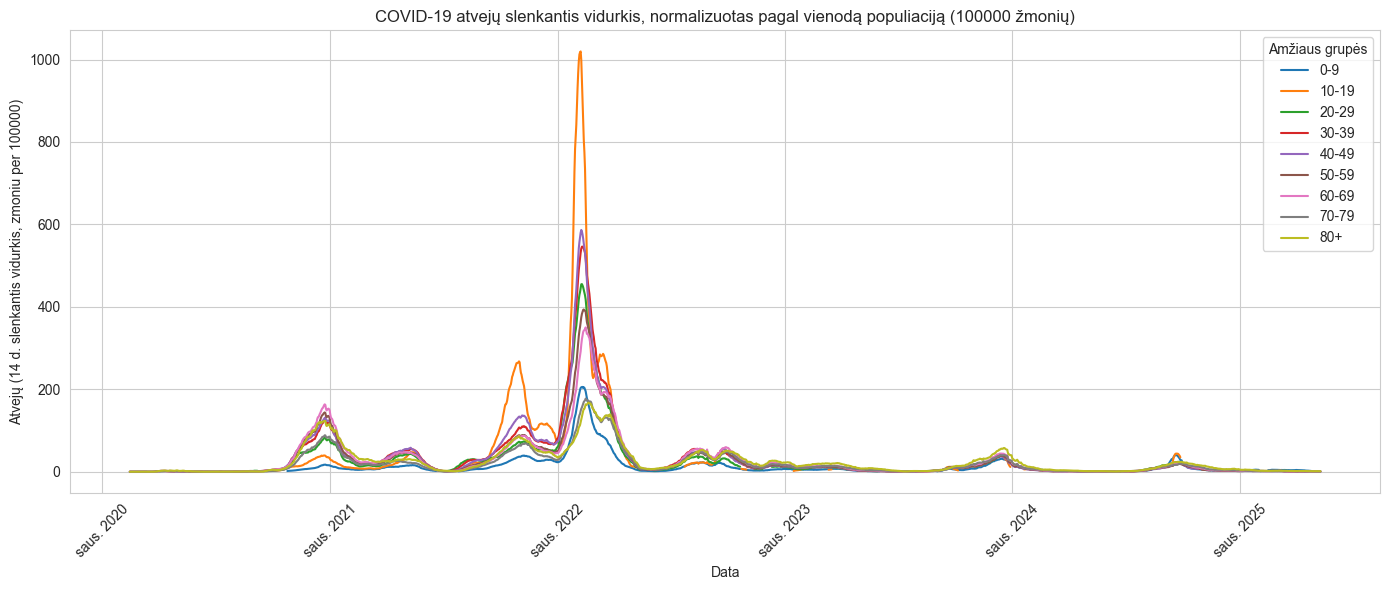

In [92]:
# Plotting
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

for column in normalized.columns:
    plt.plot(normalized.index, normalized[column], label=column) # separate line for each age group
#New COVID cases in Lithuania by age group with 14-day rolling average normalized by equal population 100,000
plt.title('COVID-19 atvejų slenkantis vidurkis, normalizuotas pagal vienodą populiaciją (100000 žmonių)')
plt.xlabel('Data')
plt.ylabel('Atvejų (14 d. slenkantis vidurkis, zmoniu per 100000)') 
plt.legend(title='Amžiaus grupės') #age groups

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()
# save the plot
plt.savefig('chart2.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()

### Filtering previous chart for the most prominent rise in new cases

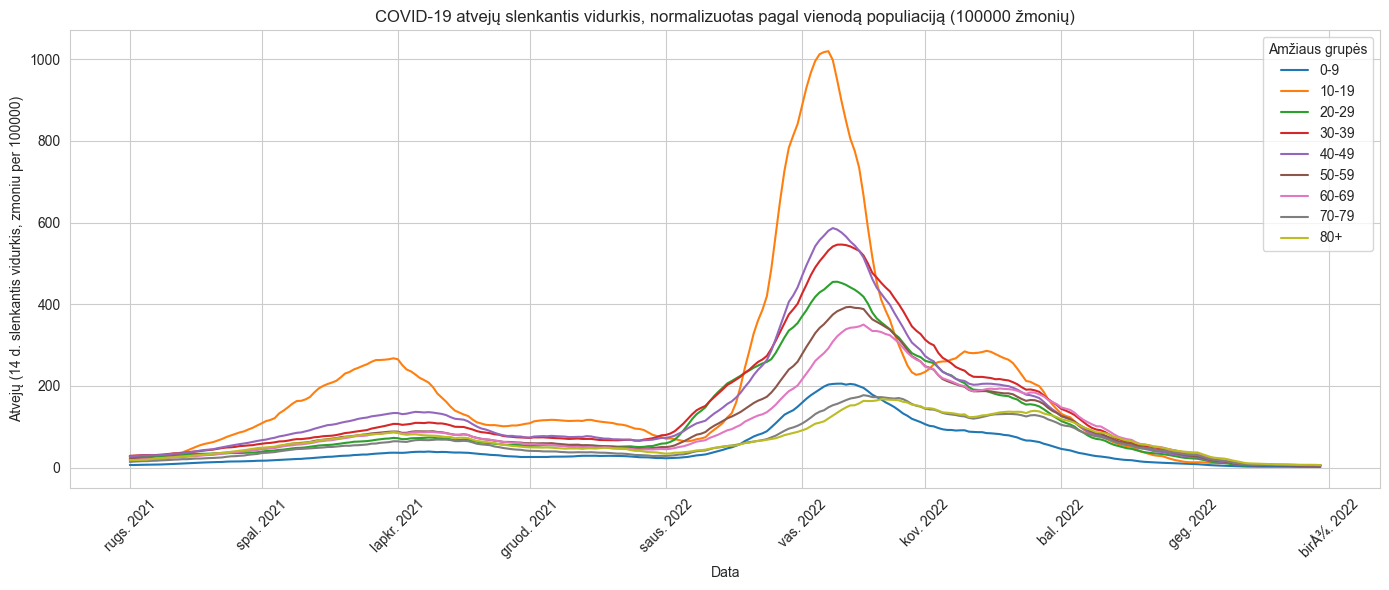

In [100]:
# Filter the data for the specified date range
filtered = normalized.loc['2021-09-01':'2022-05-30']
# Plotting
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

for column in filtered.columns:
    plt.plot(filtered.index, filtered[column], label=column)

plt.title('COVID-19 atvejų slenkantis vidurkis, normalizuotas pagal vienodą populiaciją (100000 žmonių)')
plt.xlabel('Data')
plt.ylabel('Atvejų (14 d. slenkantis vidurkis, zmoniu per 100000)')
plt.legend(title='Amžiaus grupės')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('chart3.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()

### Finding 60-days period where total sum of deaths where highest

In [94]:
daily_deaths = covid.groupby('date')['deaths_all'].sum()
daily_deaths.head()

date
2020-02-01     92
2020-02-02    102
2020-02-03    103
2020-02-04    116
2020-02-05    114
Name: deaths_all, dtype: int64

In [95]:
rolling_deaths = daily_deaths.rolling(window=60).sum()
# rolling_deaths.head()
end_day = rolling_deaths.idxmax()  # 60days interval endday where max deaths occured
print(end_day)
max_sum = rolling_deaths.max()
print(max_sum)
start_day = end_day - pd.Timedelta(days=59)
print(start_day)
print(f'Didžiausias bendras mirtingumas ({int(max_sum)} mirčių) buvo nuo {start_day.date()} iki {end_day.date()}')

2021-01-18 00:00:00
10615.0
2020-11-20 00:00:00
Didžiausias bendras mirtingumas (10615 mirčių) buvo nuo 2020-11-20 iki 2021-01-18


### Building chart for ranking municipalities by total deaths sum during this 60-days period, normalized by 100.000 people.

In [96]:
start_date='2020-11-20'
end_date='2021-01-18'
interval_df = covid[(covid['date'] >= start_date) & (covid['date'] <= end_date)]
deaths_by_muni = interval_df.groupby('municipality_name')['deaths_all'].sum().reset_index()
deaths_by_muni.tail()

,municipality_name,deaths_all
56,Šiaulių r. sav.,149
57,Šilalės r. sav.,112
58,Šilutės r. sav.,163
59,Širvintų r. sav.,59
60,Švenčionių r. sav.,101


In [ ]:
pop_df = pd.read_excel('population_2021.xlsx', sheet_name=0)
pop_df = pop_df[pop_df['municipality_name'].str.contains('sav.', na=False)] #leave only municipalities
pop_sav = pop_df[['municipality_name', 'population']] # only 2 colums from the original needed
# pop_sav.head()

merged = pd.merge(deaths_by_muni, pop_sav, on='municipality_name', how='inner') #merge deaths and population dataframes
# merged.head()
merged['deaths_per_100k'] = merged['deaths_all'] / merged['population'] * 100000 #normalize deaths by population
merged= merged.sort_values('deaths_per_100k', ascending=True) # sort in descending order

top10=merged.tail(10)
top10_names = top10['municipality_name'].tolist() 
top10

,municipality_name,deaths_all,population,deaths_per_100k
46,Varėnos r. sav.,109,21137.0,515.683399
12,Kaišiadorių r. sav.,155,29835.0,519.524049
29,Pakruojo r. sav.,98,18827.0,520.529027
5,Biržų r. sav.,123,23314.0,527.579995
23,Lazdijų r. sav.,97,18247.0,531.594235
35,Prienų r. sav.,135,25286.0,533.892272
39,Rokiškio r. sav.,161,28715.0,560.682570
3,Anykščių r. sav.,142,23321.0,608.893272
0,Akmenės r. sav.,128,19585.0,653.561399
2,Alytaus r. sav.,183,25581.0,715.374692


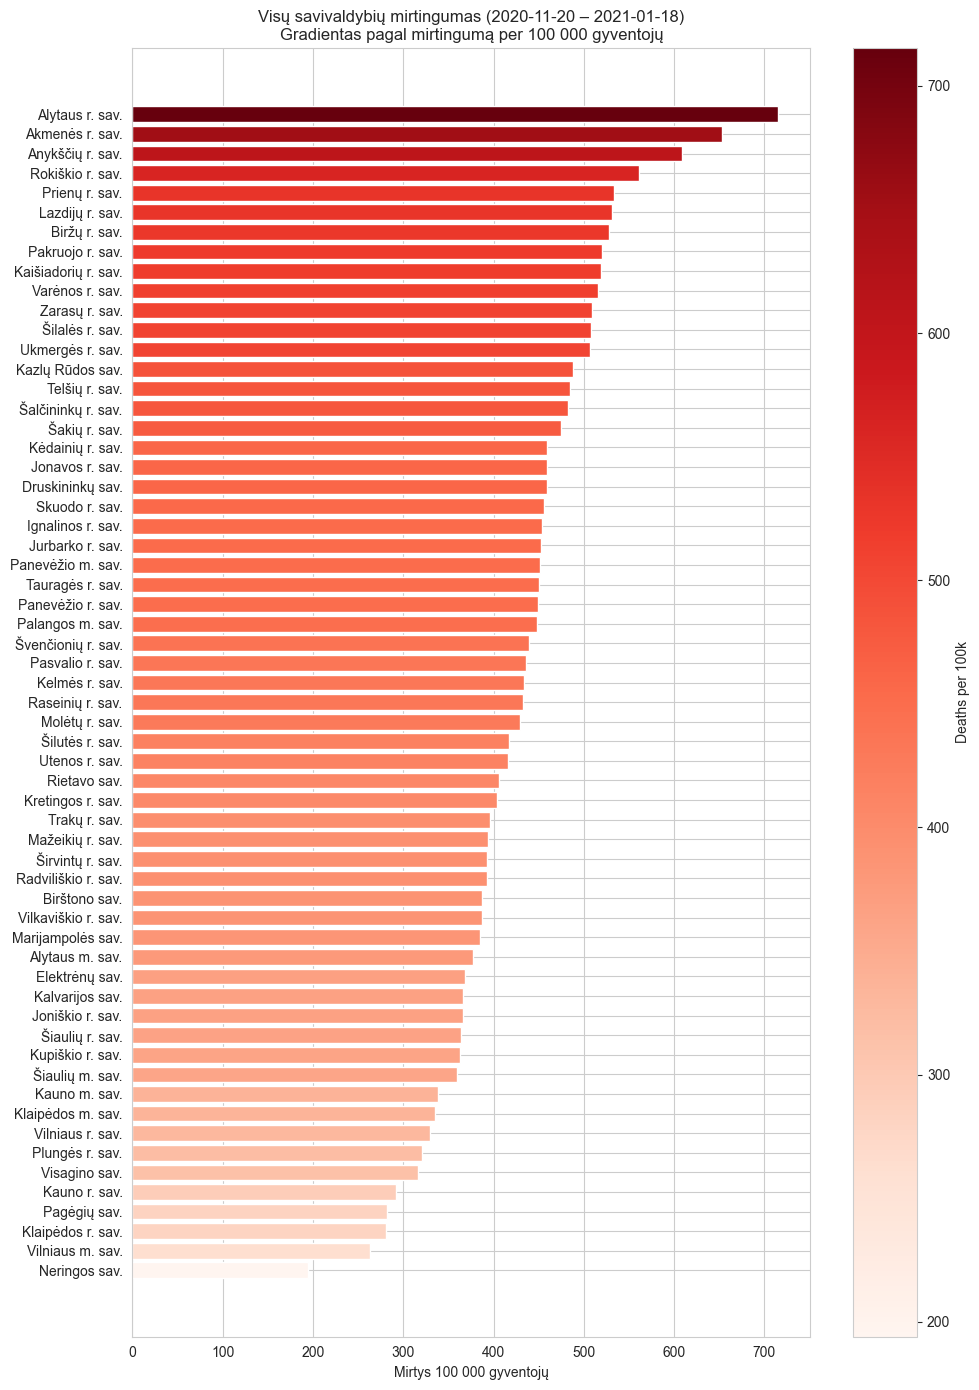

In [126]:
#plotting
# We normalize the deaths_per_100k so that the gradient spans the whole range of values.
norm = plt.Normalize(vmin=merged['deaths_per_100k'].min(), vmax=merged['deaths_per_100k'].max())
cmap = sns.color_palette("Reds", as_cmap=True)

# Apply the gradient
colors = [cmap(norm(value)) for value in merged['deaths_per_100k']]

# Plotting
plt.figure(figsize=(10, 14))  # Taller plot for many entries
bars = plt.barh(merged['municipality_name'], merged['deaths_per_100k'], color=colors)  # No edgecolor

# Add a color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This is needed to create the color bar

# Explicitly pass the axes for the color bar
plt.colorbar(sm, label='Deaths per 100k', ax=plt.gca())

# Add labels and title
plt.xlabel('Mirtys 100 000 gyventojų')
plt.title('Visų savivaldybių mirtingumas (2020-11-20 – 2021-01-18)\nGradientas pagal mirtingumą per 100 000 gyventojų')

# Final adjustments
plt.tight_layout()
plt.savefig('chart4.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()


### Visualizing previous chart on Lithuania map